# 4.1线性回归

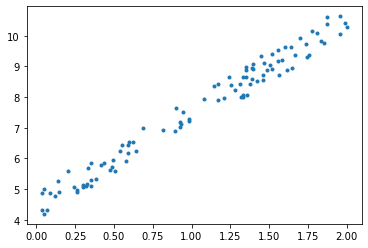

In [2]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)
import matplotlib.pyplot as plt
plt.plot(X, y, '.')
plt.show()

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [6]:
#斜率
reg.coef_

array([[3.04904027]])

In [7]:
#截距
reg.intercept_

array([4.42487127])

In [9]:
#R^2
reg.score(X, y)

0.9742484968251169

# 4.2 随机梯度下降（SGD）
* 非常适合于具有大量训练样本(>10,000)的回归问题 *
随机梯度下降的优点是：
+ 高效
+ 易于实现 (有大量优化代码的机会)
随机梯度下降的缺点包括：
- SGD需要一些超参数，例如正则化参数和迭代次数
- SGD对特征缩放非常敏感

In [11]:
x1 = 2 * np.random.rand(10000,1)
x2 = 5 * np.random.rand(10000,1)
y2 = 4 + 3 * x1 - 5 * x2 + np.random.rand(10000,1)
y = 4 + 3 * x1 + np.random.rand(10000,1)

In [18]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
reg.fit(x1, y)
#TODO: 学习曲线

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(random_state=42)

In [20]:
reg.coef_, reg.intercept_, reg.score

(array([2.99123462]),
 array([4.51247767]),
 <bound method RegressorMixin.score of SGDRegressor(random_state=42)>)

In [22]:
# 迭代次数
reg.n_iter_

7

In [23]:
# 权重更新次数
reg.t_

70001.0

In [24]:
# 标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)
x1_st = scaler.transform(x1)
reg.fit(x1_st, y)
#TODO: 标准化参数转换

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(random_state=42)

In [25]:
reg.coef_, reg.intercept_

(array([1.73046088]), array([7.51766538]))

In [26]:
reg.n_iter_

7

In [28]:
xx = np.random.rand(3,1)
xx

array([[0.50146977],
       [0.17506618],
       [0.09211128]])

In [29]:
reg.predict(scaler.transform(xx))

array([6.0121169 , 5.03490199, 4.78654455])

In [30]:
4 + 3 * xx

array([[5.5044093 ],
       [4.52519853],
       [4.27633384]])

In [ ]:
# 多元回归
x1 = 2 * np.random.rand(10000,1)
x2 = 5 * np.random.rand(10000,1)
y2 = 4 + 3 * x1 - 5 * x2 + np.random.rand(10000,1)

In [39]:
xx2 = np.c_[x1,x2]#同np.append
reg.fit(xx2, y2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(random_state=42)

In [37]:
xx2[1]

array([1.4027006 , 4.11107832])

In [40]:
reg.coef_, reg.intercept_

(array([ 2.99552513, -5.00246198]), array([4.49277082]))

# 4.3多项式回归

In [54]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(60).reshape(30, 2)
y = X[:,1]**2 + X[:,0]*X[:,1] - X[:,0]**2
#y = 0 + 0*x0 + 0*x1 - 1*x0^2 + 2*x0*x1 + 1*x1^2

In [67]:
poly = PolynomialFeatures(2)
poly.fit(X)

PolynomialFeatures()

In [68]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [69]:
X0 = poly.fit_transform(X)

In [79]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X0, y)
reg.coef_, reg.intercept_
#y = 0 + 0*x0 + 0*x1 - 1*x0^2 + 2*x0*x1 + 1*x1^2

(array([ 0.        ,  0.5       ,  0.5       , -0.16666667,  0.33333333,
         0.83333333]),
 -0.33333333333303017)

In [84]:
X0[3,:]

array([ 1.,  6.,  7., 36., 42., 49.])

In [91]:
reg.predict([X0[3,:]])
# 注意要求2维数据，需要多加一个[]

array([55.])

In [74]:
y[1]

11